<a href="https://colab.research.google.com/github/Kashika18/Machine-Learing-Basics/blob/main/Activity5_ACM_KashikaJain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Load the dataset and perform pre-processing : 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab/popularity.csv')

In [ ]:
df.head()

,Unnamed: 0,avg_shares,avg_comments,avg_expert,popularity_score
0,19,147.3,23.9,19.1,14.6
1,91,28.6,1.5,33.0,7.3
2,166,17.9,37.6,21.6,8.0
3,196,94.2,4.9,8.1,9.7
4,42,293.6,27.7,1.8,20.7


In [ ]:
df.shape

(200, 5)

1.1 Remove the first column of ‘Unnamed: 0’


In [ ]:
df.drop(['Unnamed: 0'], axis='columns',inplace=True)
df

,avg_shares,avg_comments,avg_expert,popularity_score
0,147.3,23.9,19.1,14.6
1,28.6,1.5,33.0,7.3
2,17.9,37.6,21.6,8.0
3,94.2,4.9,8.1,9.7
4,293.6,27.7,1.8,20.7
...,...,...,...,...
195,4.1,11.6,5.7,3.2
196,76.4,26.7,22.3,11.8
197,218.5,5.4,27.4,12.2
198,140.3,1.9,9.0,10.3


1.2 Detect missing values, and replace them with the mean.


In [ ]:
df.isnull().sum()

avg_shares          1
avg_comments        4
avg_expert          0
popularity_score    0
dtype: int64

In [ ]:
df.mean()

avg_shares          147.291457
avg_comments         23.319388
avg_expert           30.554000
popularity_score     14.022500
dtype: float64

In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isnull().sum()

avg_shares          0
avg_comments        0
avg_expert          0
popularity_score    0
dtype: int64

1.3 Draw box-plots for each attribute to detect if there are any outliers. 

In [ ]:
import seaborn as sns

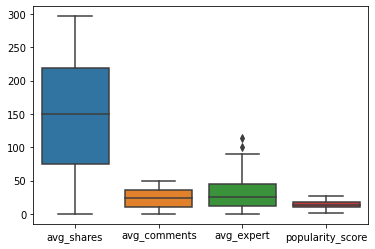

In [ ]:
sns.boxplot( data=df)

we can see outliers for avg_expert

1.4 Normalize all attributes within the range of 0 to 1.

In [ ]:
from sklearn import preprocessing

In [ ]:
# normalize the data attributes
normalized=preprocessing.normalize(df)

In [ ]:
data = pd.DataFrame(normalized,  columns = ['avg_shares','avg_comments','avg_expert','popularity_score'])

In [ ]:
data.head()

,avg_shares,avg_comments,avg_expert,popularity_score
0,0.974525,0.158121,0.126364,0.096592
1,0.645597,0.033860,0.744919,0.164785
2,0.376136,0.790096,0.453885,0.168105
3,0.989807,0.051487,0.085111,0.101923
4,0.993117,0.093697,0.006089,0.070019


In [ ]:
data.shape

(200, 4)

# 2. Visualize through scatter plots the relationship of each attribute with the target attribute.


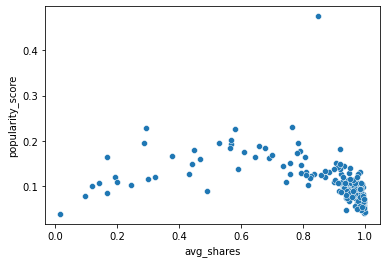

In [ ]:
sns.scatterplot(data=data, y=data['popularity_score'], x=data['avg_shares'])

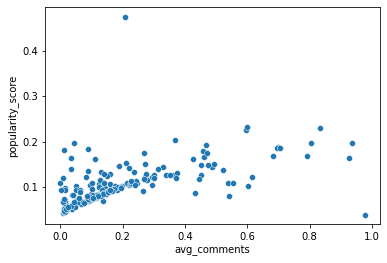

In [ ]:
sns.scatterplot(data=data, y=data['popularity_score'], x=data['avg_comments'])

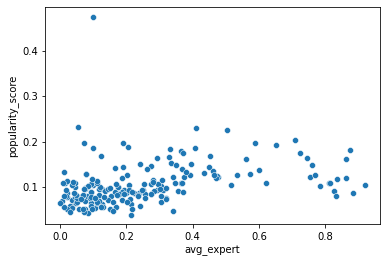

In [ ]:
sns.scatterplot(data=data, y=data['popularity_score'], x=data['avg_expert'])

# 3. Split the dataset into train and test, into 70% and 30% respectively.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['avg_comments','avg_shares','avg_expert']]
y = df['popularity_score']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X.shape

(200, 3)

In [ ]:
y.shape

(200,)

# 4. Train the linear regression model and print the coefficients (parameters) learned by the final model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.9189035493708155

In [ ]:
reg.coef_

array([ 0.17622832,  0.04651747, -0.00259482])

In [ ]:
reg.intercept_

3.1686191136872885

In [ ]:
y_pred = reg.predict(X_test)
y_pred

array([20.35415844,  6.45597707, 17.72241487, 20.42287693, 14.04942744,
       16.39044396, 16.56657763, 12.96196116,  4.60925948, 19.04602716,
       11.52266396,  8.7529199 ,  8.24702   ,  7.57843892, 18.57963874,
       15.45831288, 11.36998569, 16.19647129,  6.11013978,  9.23723103,
        6.83284677, 23.00190551, 14.21322153, 14.07928893, 12.23399335,
       10.1508406 , 15.07150338, 12.00740609, 20.48096617, 23.28995867,
       11.20823915, 11.56268447, 16.73464157, 16.42974496, 21.59363175,
       24.55840851, 12.91933698, 17.22105564, 23.96633392, 12.44779051,
       16.69883224, 17.19800932, 18.31998155, 11.42396531, 19.4585322 ,
        3.78206196, 15.96426251,  7.73652333, 15.31318075, 11.34089782,
        6.71033634, 13.97100151, 20.33537617, 14.94676092,  8.23964927,
       15.04965303, 23.59078657, 18.91258879, 15.07848421, 12.69332557])

# 5. Print the confidence interval and p-value of each of the coefficients, and explain your interpretations. 

In [ ]:
#confidence interval
import scipy.stats as st
st.norm.interval(alpha=0.95, loc=np.mean(X_train), scale=st.sem(X_train))

(array([ 20.28224867, 131.78909124,  27.0491451 ]),
 array([ 25.18858224, 159.4537659 ,  34.53371204]))

**Observation:**
1.  We are confident that 95% of the time *avg_shares* lies between 20.91393267 and 25.75975538

2.   We are confident that 95% of the time *avg_comments* lies between 130.85265195 and 159.18436886

3.   We are confident that 95% of the time *avg_expert* lies between 28.12270478 and 35.13872379





In [ ]:
import statsmodels.api as sm

est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:       popularity_score   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              2116.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                   1.64e-114
Time:                        12:38:21   Log-Likelihood:                         -305.47
No. Observations:                 140   AIC:                                      616.9
Df Residuals:                     137   BIC:                                      625.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

**Observation:**

*   Using the P>|t| result, we can infer that the variables 'avg_comments', 'avg_shares' and 'avg_expert' are statistically significant variables, as their p-value are less than 0.05.

*   There is a strong relationship between all the variable and the target.



#  6. Evaluate the linear regression model and print the values of RMSE, MAE, and MSE.

In [ ]:
#Imporing metrics library
from sklearn import metrics

In [ ]:
# MAE(mean absolute error)
metrics.mean_absolute_error(y_test,y_pred)

1.285772463083359

In [ ]:
# Mean squared error (MSE)
metrics.mean_squared_error(y_test , y_pred)

2.500171134317504

In [ ]:
#  Root mean squared error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.5811929465809997

# 7. Plot residual curve and Q-Q plot.

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#fit multiple linear regression model
model = ols('popularity_score ~ avg_shares + avg_comments + avg_expert', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       popularity_score   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     548.3
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           4.95e-95
Time:                        12:38:21   Log-Likelihood:                -389.70
No. Observations:                 200   AIC:                             787.4
Df Residuals:                     196   BIC:                             800.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8859      0.319      9.051   

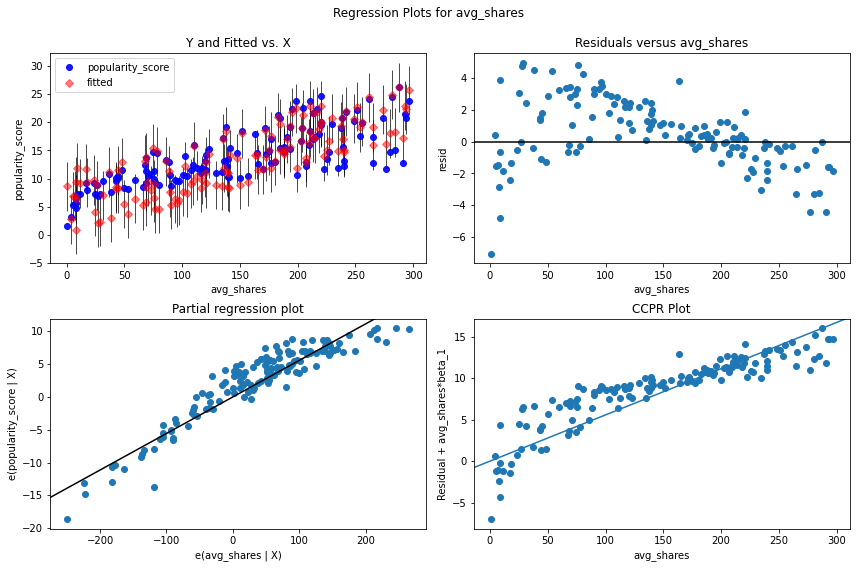

In [ ]:
#create residual vs. predictor plot for 'avg_shares'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est2, 'avg_shares', fig=fig)

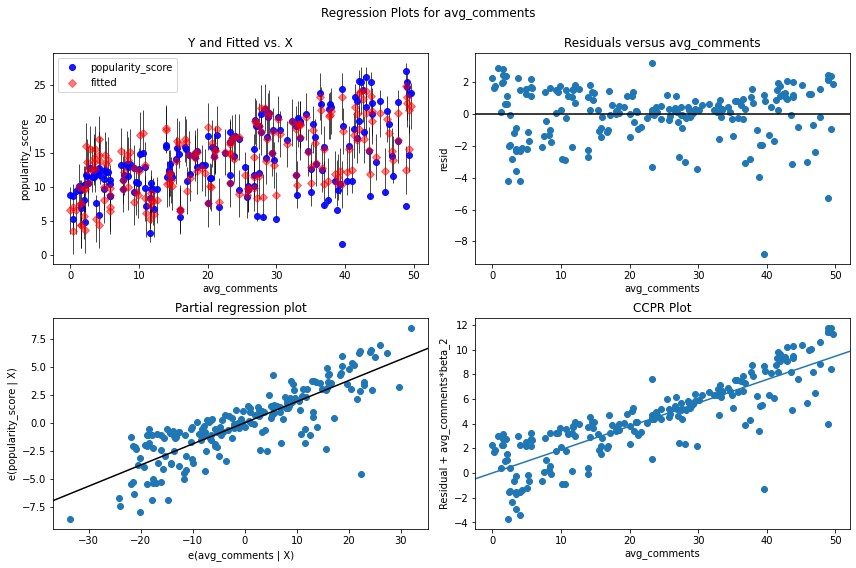

In [ ]:
#create residual vs. predictor plot for 'avg_comments'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'avg_comments', fig=fig)

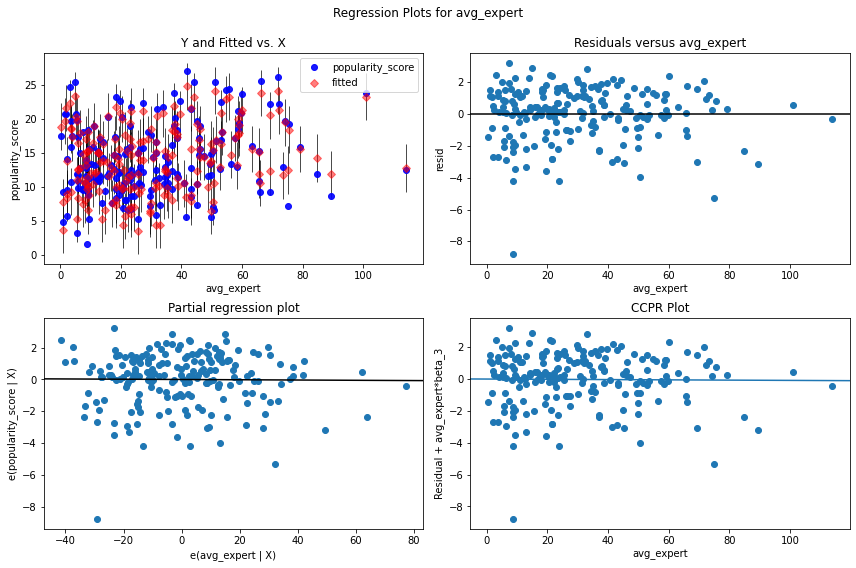

In [ ]:
#create residual vs. predictor plot for 'avg_expert'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'avg_expert', fig=fig)

**Q-Q Plot**

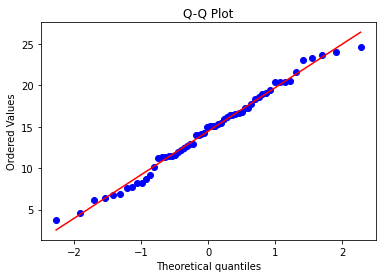

In [ ]:
res = stats.probplot(y_pred, plot=plt)
plt.title('Q-Q Plot')
plt.show()

#Converting into pdf

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Activity5_ACM_KashikaJain.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





